<a href="https://colab.research.google.com/github/4rdnac/Machine-Learning_2025/blob/main/Kuis1_2341720187_CANDRA_AHMAD_DANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [126]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [143]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [144]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [152]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [153]:
# Data Size
df.shape

(48842, 15)

In [154]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [155]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [156]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df['workclass'].fillna(value="Private", inplace=True)
df['occupation'].fillna(value="Handlers-cleaners	", inplace=True)
df['native-country'].fillna(value="United-States", inplace=True)
df.isnull().sum()

/tmp/ipython-input-3709040088.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(value="Private", inplace=True)
/tmp/ipython-input-3709040088.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [157]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import pandas as pd

categorical_cols = df.select_dtypes(include=["object", "category"]).columns

for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts(dropna=False))



Kolom: workclass
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Kolom: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Kolom: marital-status
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

Kolom: occupation
occupa

In [158]:
df["workclass"] = df["workclass"].replace({
    "?": "Others",
    "Without-pay": "Others",
    "Never-worked": "Others"
})

df["occupation"] = df["occupation"].replace({
    "?": "Others",
    "Handlers-cleaners\t": "Handlers-cleaners",
    "Armed-Forces": "Others"
})

df["marital-status"] = df["marital-status"].replace({
    "Married-AF-spouse": "Married"
})

df["native-country"] = df["native-country"].replace({
    "?": "Others",
    "Holand-Netherlands": "Others"
})

df["income"] = df["income"].replace({
    "<=50K.": "<=50K",
    ">50K.": ">50K"
})

for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts(dropna=False))


Kolom: workclass
workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Others               1867
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

Kolom: education
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Kolom: marital-status
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married                     37
Name: count, dtype: int64

Kolom: occupation
occupation
Prof-specialty       6172
Craft-repair         

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

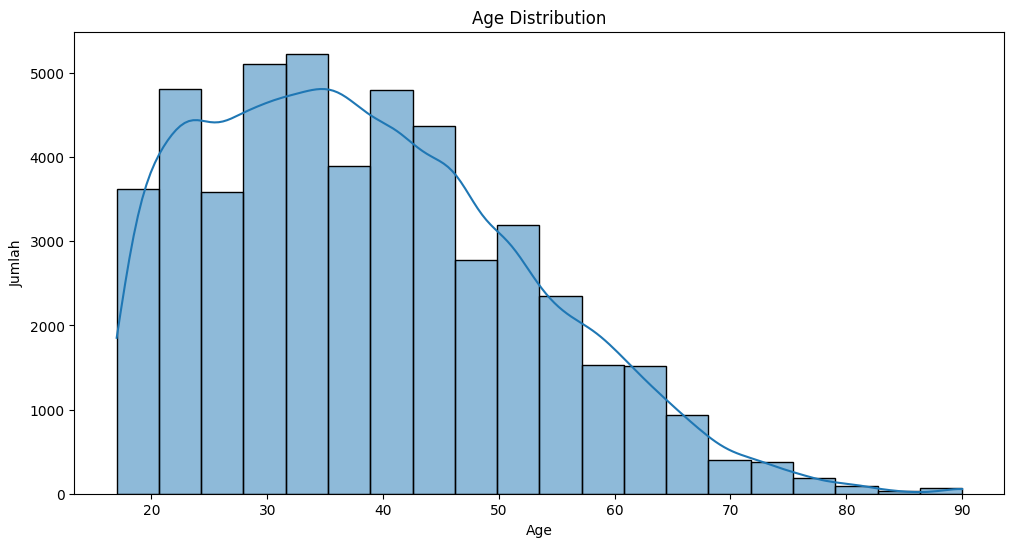

In [159]:
# Jawab 1.1 - Histrogram
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Jumlah")
plt.show()


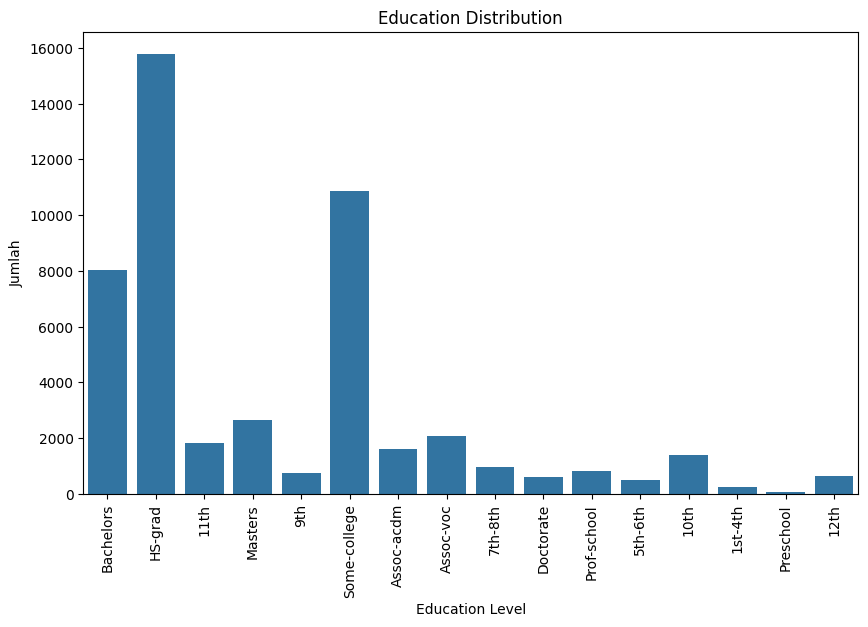

In [137]:
# Jawab 1.2 - Barchart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="education")
plt.title("Education Distribution")
plt.xlabel("Education Level")
plt.ylabel("Jumlah")
plt.xticks(rotation=90)
plt.show()


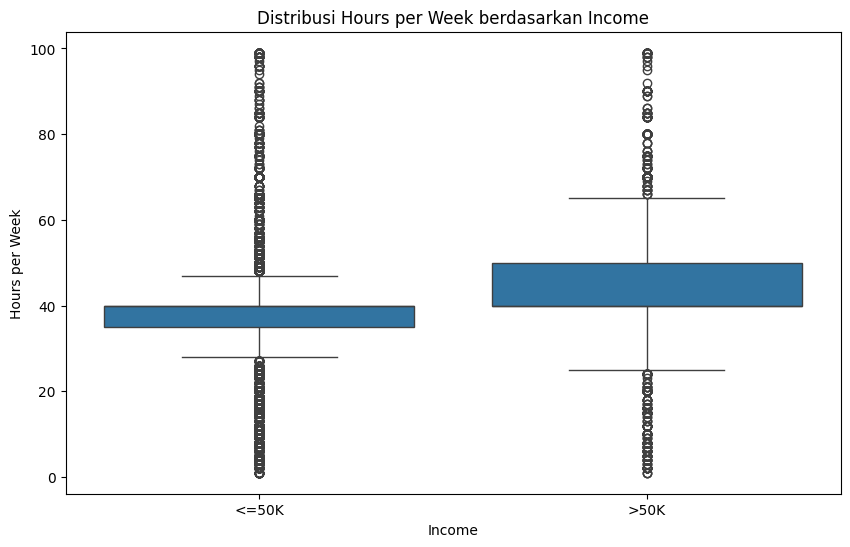

In [160]:
# Jawab 1.3 - Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="income", y="hours-per-week")
plt.title("Distribusi Hours per Week berdasarkan Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

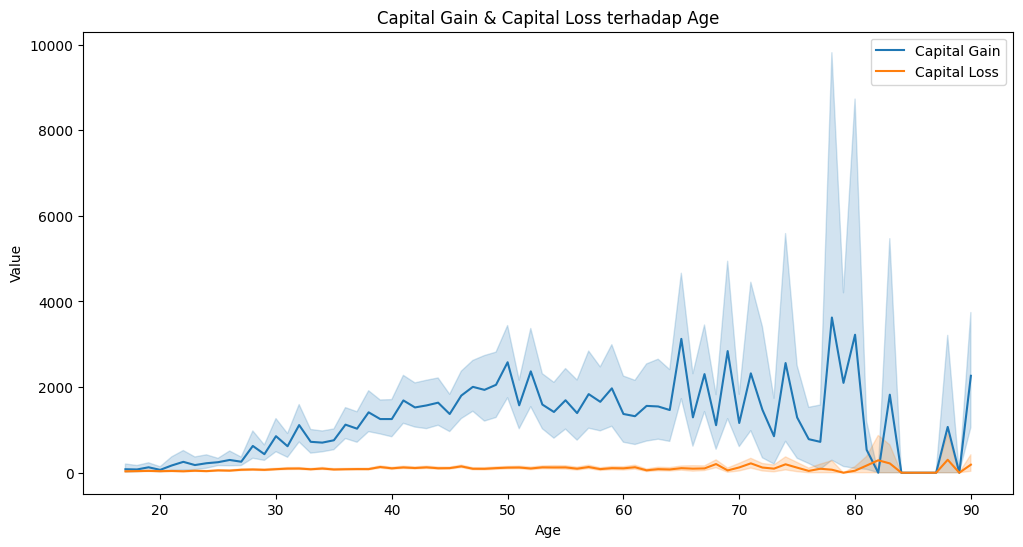

In [161]:
# Jawab 1.4 - Lineplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="age", y="capital-gain", label="Capital Gain")
sns.lineplot(data=df, x="age", y="capital-loss", label="Capital Loss")

plt.title("Capital Gain & Capital Loss terhadap Age")
plt.xlabel("Age")
plt.ylabel("Value")
plt.legend()
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [162]:
# Jawab dengan komentar python

print('''
1. Yang terjadi pada distribusi data 'age' adalah right skewed dimana pada rentang umur 20-50 tahun sangat tinggi, sementara jumlah menurun drastis pada umur 60 tahun keatas.
2. Untuk variabel numerik seperti age, median imputation lebih aman dibanding mean karena median lebih tahan terhadap outlier''')
import pandas as pd

# Fungsi untuk menghitung outlier berdasarkan IQR
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Hitung jumlah outlier untuk tiap kategori income
outliers_per_income = df.groupby("income")["hours-per-week"].apply(count_outliers)
print('3. ')
print(outliers_per_income)
print("\nKategori dengan outlier terbanyak:", outliers_per_income.idxmax())



1. Yang terjadi pada distribusi data 'age' adalah right skewed dimana pada rentang umur 20-50 tahun sangat tinggi, sementara jumlah menurun drastis pada umur 60 tahun keatas.
2. Untuk variabel numerik seperti age, median imputation lebih aman dibanding mean karena median lebih tahan terhadap outlier
3. 
income
<=50K    11706
>50K       781
Name: hours-per-week, dtype: int64

Kategori dengan outlier terbanyak: <=50K


# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [163]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

print(df[['sex', 'income']].head())


   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

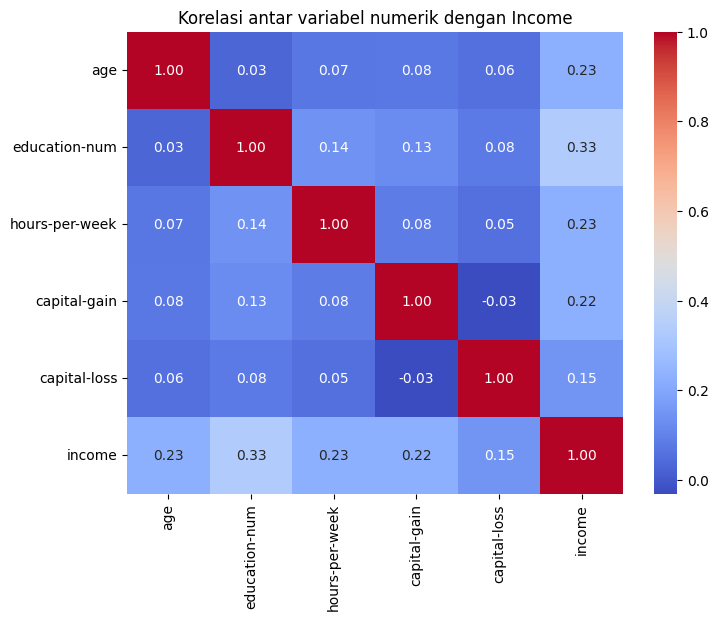

In [164]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel numerik dengan Income")
plt.show()


In [166]:
# Hasil analisis jelaskan pada cell ini
print('''Berdasarkan hasil korelasi, dapat disimpulkan korelasi paling pada variabel bahwa age (0.23) punya pengaruh paling kuat terhadap income,
sedangkan yang lain korelasinya lemah. ini menandakan usia berpengaruh terhadap penghasilan.''')

Berdasarkan hasil korelasi, dapat disimpulkan korelasi paling pada variabel bahwa age (0.23) punya pengaruh paling kuat terhadap income, 
sedangkan yang lain korelasinya lemah. ini menandakan usia berpengaruh terhadap penghasilan.


# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [171]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


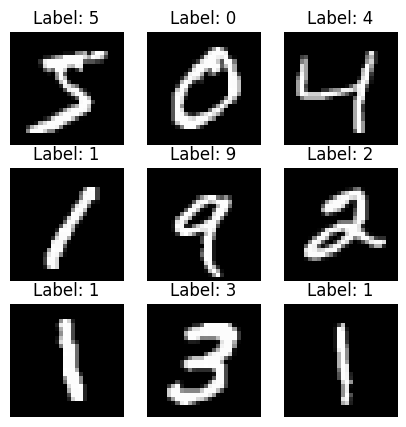

In [192]:
# Inspeksi Visual

plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

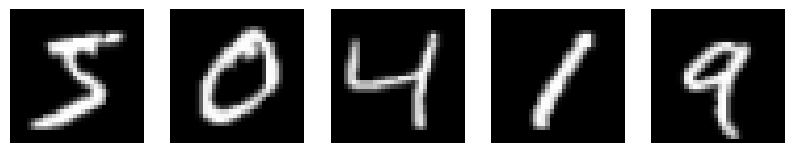

In [203]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
num_samples = X_train.shape[0]

X_train_up = np.zeros((num_samples, 32, 32))
X_train_up = X_train_up / 255.0

# Lakukan resize setiap gambar
for i in range(num_samples):
    X_train_up[i] = cv2.resize(X_train[i], (32, 32))

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.axis("off")
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

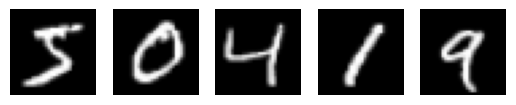

In [202]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

X_train_up = X_train_up / 255.0

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train_up[i], cmap="gray")
    plt.axis("off")
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [201]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import numpy as np

num_samples = X_test_up.shape[0]

X_test_flat = np.zeros((num_samples, 32*32))

for i in range(num_samples):
    X_test_flat[i] = X_test_up[i].reshape(-1)

print("Shape sebelum flatten :", X_test_up.shape)
print("Shape sesudah flatten:", X_test_flat.shape)


Shape sebelum flatten : (10000, 32, 32)
Shape sesudah flatten: (10000, 1024)
